<a href="https://colab.research.google.com/github/melancholymans/ShogiAIBook2/blob/main/notebook/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ランタイムタイプの確認

「ランタイム」－「ランタイムのタイプを変更」から、「ハードウェア アクセラレータ」が「GPU」になっていることを確認します。なっていない場合、「GPU」に変更します。

## CUDAバージョンの確認

In [1]:
!nvidia-smi

Wed Nov 26 21:40:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


## タイムゾーンの変更

In [3]:
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Asia/Tokyo /etc/localtime
!date

Thu Nov 27 06:41:05 AM JST 2025


## 共有アイテムのショートカット作成

* 共有リンクを開く
  * [ShogiAIBookData](https://drive.google.com/drive/folders/13XZ-VQ58QoIJBZAg0RPM44-etsJtZNAG?usp=sharing)


* Google Drive の「共有アイテム」>「ShogiAIBookData」を右クリックする
* 「ドライブにショートカットを追加」をクリックする
> 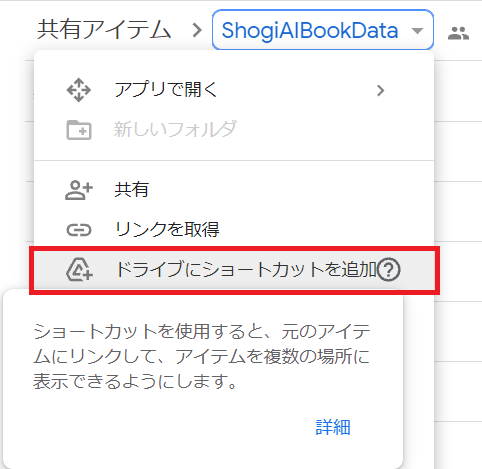

* 「ショートカットを追加」をクリックする
> 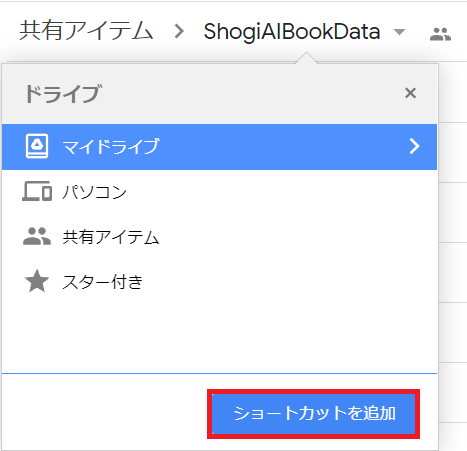

* 以降の手順は、「マイドライブ」直下に、ショートカットを設置した場合を想定する

### Tips
* Colab 以外の環境では、Google Drive からダウンロードするよりも、[rclone](https://rclone.org/) でデータをコピーする方が速く、確実です。
 * [install](https://rclone.org/install/)
 * [Google Drive](https://rclone.org/drive/)


# Google Drive のマウント

In [5]:
# [Go to this URL in a browser:] -> [https://accounts.google.com/o/oauth2/auth?client_id=xxxxx ...] のリンクをクリックし、ログインする
# [Enter your authorization code:] -> 「このコードをコピーし、アプリケーションに切り替えて貼り付けてください。」のコードをコピーし、ペーストする

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* ```https://accounts.google.com/o/oauth2/auth?client_id=xxxxx ...``` のリンクをクリックする
> 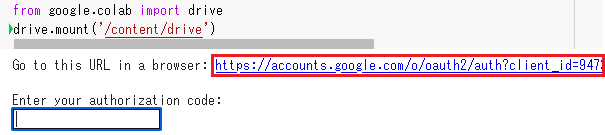

* 「Google Drive」を利用するアカウントをクリックする
> 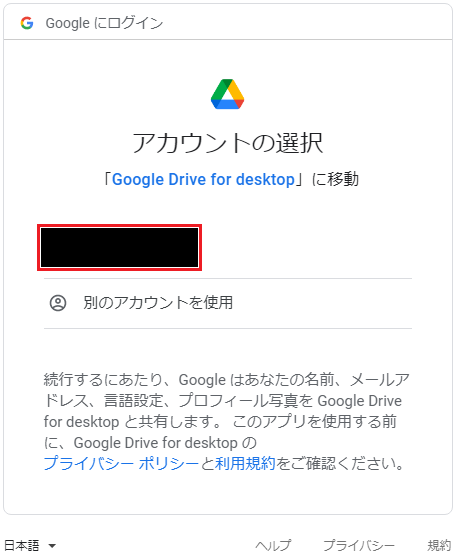

* 「ログイン」をクリックする
> 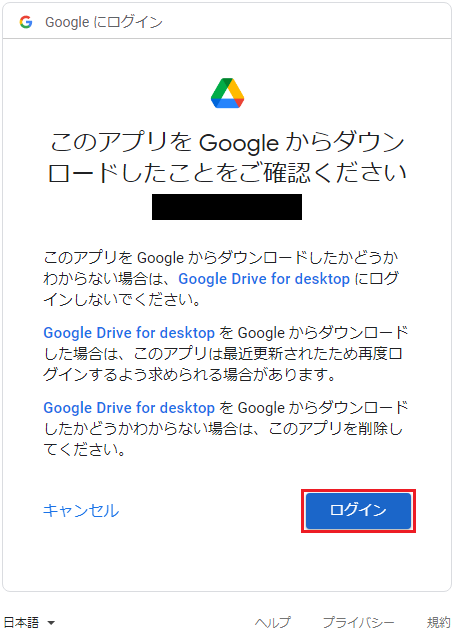

* 「コード」をコピーする
> 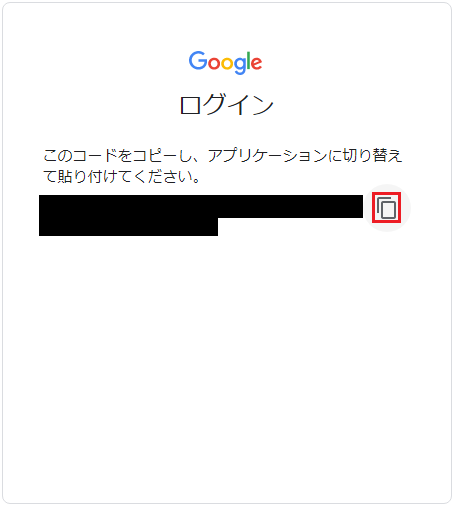

* ```Enter your authorization code:``` の入力欄にペーストし、「Enter」キーを押下する
> 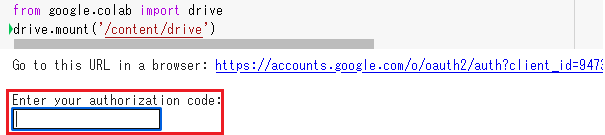

In [6]:
!ls -ld "/content/drive/My Drive/"

drwx------ 2 root root 4096 Nov 27 06:47 '/content/drive/My Drive/'


# dlshogiのインストール

## pip でインストールする場合

In [11]:
!python -V
!pip -v

Python 3.12.12

Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion             

In [15]:
# pip でインストールする場合
#!pip install dlshogi==0.1.1
#!pip install -U pip
!pip install dlshogi

## GitHub のソースからインストールする場合

GitHubのソースを変更して試したい場合は、ソースからインストールすることもできます。コメントアウトしているため、コメントを外して実行してください。git cloneはどちらか必要な方のコメントを外してください。

In [18]:
%%bash
# GitHub のソースから、最新版をインストールする場合
!git clone https://github.com/TadaoYamaoka/DeepLearningShogi.git

# GitHub のソースから、v0.1.1をインストールする場合
#git clone https://github.com/TadaoYamaoka/DeepLearningShogi.git -b v0.1.0

!cd DeepLearningShogi
!pip install -e .

bash: line 2: !git: command not found
bash: line 7: !cd: command not found
bash: line 8: !pip: command not found


CalledProcessError: Command 'b'# GitHub \xe3\x81\xae\xe3\x82\xbd\xe3\x83\xbc\xe3\x82\xb9\xe3\x81\x8b\xe3\x82\x89\xe3\x80\x81\xe6\x9c\x80\xe6\x96\xb0\xe7\x89\x88\xe3\x82\x92\xe3\x82\xa4\xe3\x83\xb3\xe3\x82\xb9\xe3\x83\x88\xe3\x83\xbc\xe3\x83\xab\xe3\x81\x99\xe3\x82\x8b\xe5\xa0\xb4\xe5\x90\x88\n!git clone https://github.com/TadaoYamaoka/DeepLearningShogi.git\n\n# GitHub \xe3\x81\xae\xe3\x82\xbd\xe3\x83\xbc\xe3\x82\xb9\xe3\x81\x8b\xe3\x82\x89\xe3\x80\x81v0.1.1\xe3\x82\x92\xe3\x82\xa4\xe3\x83\xb3\xe3\x82\xb9\xe3\x83\x88\xe3\x83\xbc\xe3\x83\xab\xe3\x81\x99\xe3\x82\x8b\xe5\xa0\xb4\xe5\x90\x88\n#git clone https://github.com/TadaoYamaoka/DeepLearningShogi.git -b v0.1.0\n\n!cd DeepLearningShogi\n!pip install -e .\n'' returned non-zero exit status 127.

GitHubのソースからインストールした場合は、環境変数PATHを通します。下記のログの可視化のために、ノートブック上でdlshogi.utilsをインポートするために必要です。

In [ ]:
# 環境変数PATHを通す
#import sys
#sys.path.append('/content/DeepLearningShogi')

# 作業ディレクトリの作成

In [19]:
!mkdir -p /content/ShogiAIBook
!mkdir -p "/content/drive/My Drive/ShogiAIBook"
!mkdir -p "/content/drive/My Drive/ShogiAIBook/model"
!mkdir -p "/content/drive/My Drive/ShogiAIBook/log"

# シンボリックリンクの作成

In [20]:
%cd /content/ShogiAIBook

/content/ShogiAIBook


In [21]:
!ln -s "/content/drive/My Drive/ShogiAIBook/log"   ./log
!ln -s "/content/drive/My Drive/ShogiAIBook/model" ./model
!ln -s "/content/drive/My Drive/ShogiAIBookData"   ./data

# データの確認

In [22]:
!ls -ld ./data/*

-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-001.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-002.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-003.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-004.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-005.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-006.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-007.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-008.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-009.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-010.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-011.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data/dlshogi_with_gct-012.hcpe
-r-------- 1 root root 356250760 Sep 10  2021 ./data

# 学習

学習用のシェルスクリプト(train.sh)を作成します。

In [23]:
%%writefile train.sh
#!/bin/bash

# 学習するエポックの閾値の上限値。72エポック（24分割した教師データ*3サイクル）学習する。
last=72

# 引数がある場合は上書きする
if [ $# -ge 1 ]; then
    last=$(($1))
fi

# 変数設定
name="resnet10_swish"
log_dir="./log"
model_dir="./model"
data_dir="./data"

# 最新のチェックポイント+1から学習を再開する。
for i in $(ls -v ${model_dir}/checkpoint_${name}-???.pth 2>/dev/null); do chkp=$i; done
if [ -v chkp ]; then
    start=$(expr ${chkp: -7:3} + 1)
else
    start=1
fi

for ((i=$start; i<=$last; i++)); do
    iii=$(printf "%03d" $i)
    jjj=$(printf "%03d" $((i-1)))
    kkk=$(printf "%03d" $(((i-1) % 24 + 1)))

    # floodgate、水匠3改、dlshogi_with_gctの教師データ（24分割）を順番に学習する。
    src="${data_dir}/floodgate_2019-2021_r3500-${kkk}.hcpe ${data_dir}/suisho3kai-${kkk}.hcpe ${data_dir}/dlshogi_with_gct-${kkk}.hcpe"

    # チェックポイントが存在する場合、最新のチェックポイントから学習を継続する。
    if [ $i -eq 1 ]; then
        resume=""
    else
        resume="-r ${model_dir}/checkpoint_${name}-${jjj}.pth"
    fi

    # 最終エポックの学習のみモデルファイルを保存する。
    if [ $i -eq $last ]; then
        model="--model ${model_dir}/model_${name}-{epoch:03}"
    else
        model=""
    fi

    # チェックポイントファイル名
    checkpoint="${model_dir}/checkpoint_${name}-{epoch:03}.pth"

    # ログファイル名
    log="${log_dir}/${name}-${iii}.txt"

    # 前回中断時のログファイルがある場合、削除する。
    if [ -e ${log} ]; then
        rm -f ${log}
    fi

    echo epoch ${i} start.

    # 学習
    python -m dlshogi.train                                            \
              ${src}                                                   \
              ${data_dir}/floodgate_test_2017-2018_r3500_eval5000.hcpe \
              --network ${name}                                        \
              ${resume}                                                \
              --checkpoint ${checkpoint}                               \
              ${model}                                                 \
              --lr_scheduler "StepLR(step_size=24,gamma=0.1)"          \
              --use_swa                                                \
              --swa_start_epoch 10                                     \
              --use_average                                            \
              --use_evalfix                                            \
              $2 $3 $4 $5 $6 $7 $8 $9 | tee ${log}
    if [ $? -ne 0 ]; then
        break
    fi
done

Writing train.sh


作成したシェルスクリプトに実行権を付与します。

In [24]:
!chmod 755 train.sh

学習用シェルスクリプトを実行します。

割り当てられたGPUがK80の場合は、そのまま実行してください。

割り当てられたGPUがP100、T4もしくはV100の場合は、「# K80で学習する場合」の次の行をコメントアウトして、「# K80以外で学習する場合」の次の行のコメントを外して実行してください。

1 epochだけ試したい場合は、「# K80で学習する場合」の次の行をコメントアウトして、「1 epochだけ試したい場合」の次の行のコメントを外して実行してください。


In [25]:
# K80で学習する場合
#!./train.sh 72 --lr 0.01 --batchsize 1024 --eval_interval 100

# K80以外で学習する場合
!./train.sh 72 --lr 0.04 --batchsize 4096 --use_amp

# 1 epochだけ試したい場合
#!./train.sh 1 --lr 0.01 --batchsize 1024 --eval_interval 100

epoch 1 start.
/usr/bin/python3: No module named dlshogi.train
epoch 2 start.
/usr/bin/python3: No module named dlshogi.train
epoch 3 start.
/usr/bin/python3: No module named dlshogi.train
epoch 4 start.
/usr/bin/python3: No module named dlshogi.train
epoch 5 start.
/usr/bin/python3: No module named dlshogi.train
epoch 6 start.
/usr/bin/python3: No module named dlshogi.train
epoch 7 start.
/usr/bin/python3: No module named dlshogi.train
epoch 8 start.
/usr/bin/python3: No module named dlshogi.train
epoch 9 start.
/usr/bin/python3: No module named dlshogi.train
epoch 10 start.
/usr/bin/python3: No module named dlshogi.train
epoch 11 start.
/usr/bin/python3: No module named dlshogi.train
epoch 12 start.
/usr/bin/python3: No module named dlshogi.train
epoch 13 start.
/usr/bin/python3: No module named dlshogi.train
epoch 14 start.
/usr/bin/python3: No module named dlshogi.train
epoch 15 start.
/usr/bin/python3: No module named dlshogi.train
epoch 16 start.
/usr/bin/python3: No module named

## 出力される警告
* 以下の警告については、学習が正常に行われていれば、問題ない。

> tcmalloc: large alloc xxxxxxxxxx bytes ...
* 教師データが多い場合に、[パフォーマンスツール](https://github.com/gperftools/gperftools) から出力される。
* 【参考】https://stackoverflow.com/questions/9077457/how-to-trace-tcmalloc-large-alloc

> FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. ...
* Inf or NaN が含まれている場合に、[PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.utils.clip_grad_norm_.html) から出力される。
* 【参考】https://discuss.pytorch.org/t/what-to-do-for-non-finite-warning-in-clip-grad-norm/127700


# ログの可視化

学習の精度をログから可視化します。学習をスキップした場合は、この手順はスキップしてください。

In [26]:
# train
import dlshogi.utils
dlshogi.utils.plot_log_policy_value('./log/*.txt', '--grid')

ModuleNotFoundError: No module named 'dlshogi.utils'

In [27]:
# test
import dlshogi.utils
dlshogi.utils.plot_log_policy_value('./log/*.txt', '--testloss', '--grid')

ModuleNotFoundError: No module named 'dlshogi.utils'

# 学習済みファイルのコピー

学習をスキップした場合や1 epochだけ試した場合は、全て(72 epoch)学習したファイルをGoogleドライブからコピーしてください。コメントアウトしているため、コメントアウトを外して実行してください。

In [ ]:
#!cp ./data/model/checkpoint_resnet10_swish-072.pth ./model/
#!cp ./data/model/model_resnet10_swish-072 ./model/

# onnxモデル変換

In [28]:
!python -m dlshogi.convert_model_to_onnx --network resnet10_swish ./model/model_resnet10_swish-072 ./model/model_resnet10_swish-072.onnx

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/dlshogi/convert_model_to_onnx.py", line 5, in <module>
    from dlshogi.network.policy_value_network import policy_value_network
ModuleNotFoundError: No module named 'dlshogi.network'


In [29]:
!ls -l ./model/model_resnet10_swish-072.onnx

ls: cannot access './model/model_resnet10_swish-072.onnx': No such file or directory
